<div style="background-color: black; color: white; padding: 10px;text-align: center;">
  <strong>Date Published:</strong> June 26, 2025 <strong>Author:</strong> Adnan Alaref
</div>

<p align="center">
    
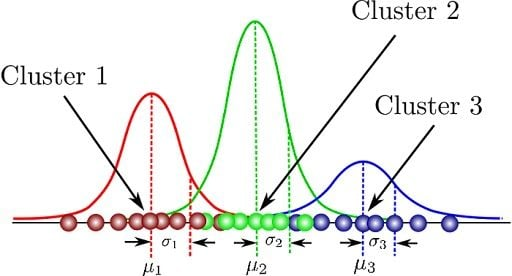
</p>

# **◍ Step 1: Introduction.**   

## 🔹 **1. What Is GMM?**   
A __Gaussian Mixture Model (GMM) is a probabilistic model__ that assumes the data is generated from a mixture of several __Gaussian distributions__ with unknown parameters.

Each Gaussian represents a cluster, but unlike K-Means, GMMs allow __soft clustering__: each point has a __probability__ of belonging to each cluster.


---


## **🔹 2. Mathematical Formulation**  
Gaussian Mixture Model (GMM) Probability Density Function
The probability of a data point x under a GMM is:  
For K components:

$$
p(x) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x \mid \mu_k, \Sigma_k)
$$

Where:
* πk: mixing coefficient, ∑πₖ=1 , πₖ > 0
* μk: mean of component 𝙺
* Σk: covariance matrix of component 𝙺
* N(x∣μₖ,Σₖ​): multivariate normal density.


---


## 🔹 **3. Expectation-Maximization (EM) Algorithm**  
The most common method to fit Gaussian Mixture Models (GMMs).


✅ **EM Steps:**
    
**🔸 E-Step:** Compute the responsibility

$$
\gamma_{ik} = \frac{\pi_k \cdot \mathcal{N}(x_i \mid \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \cdot \mathcal{N}(x_i \mid \mu_j, \Sigma_j)}
$$

Where:  
- \( π_k \) is the prior probability of component \( k \)  
- \( 𝒩(x_i | μ_k , Σ_k) \) is the Gaussian probability density function  
- \( γ_k \) represents the probability that sample \( x_i \) belongs to component \( k \)



**🔸 M-Step:** Update parameters using γik

$$
\mu_k = \frac{\sum_i \gamma_{ik} x_i}{\sum_i \gamma_{ik}}, \quad
\Sigma_k = \frac{\sum_i \gamma_{ik} (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_i \gamma_{ik}}, \quad
\pi_k = \frac{1}{N} \sum_i \gamma_{ik}
$$


🔁 **Repeat until convergence** (i.e., change in __log-likelihood < threshold__ or  __rtol__ in sklearn).


---


## **🔹 4. Practical Considerations**

<br>

#### 🔸 **4.1. Initialization: K-Means or Random**

When fitting a GMM using the Expectation-Maximization (EM) algorithm, you need initial values for:

- Component means \( μ _k \)  
- Covariances \( Σ_k \)  
- Mixing weights \( π_k \)

**Why it matters:**  
Bad initialization can lead to poor local optima or slow convergence.

**Options:**

- **K-Means** (default in scikit-learn):  
  Initialize the GMM using centroids from K-Means.

- **Random**:  
  Choose random data points as initial means.

   
```python
from sklearn.mixture import GaussianMixture
model = GaussianMixture(init_params='kmeans')  # or 'random'
```

✅ Tip: Prefer 'kmeans' for faster and more stable convergence.


---



#### 🔸 **4.2 Covariance Types**

The `covariance_type` argument controls how flexible the shape of each Gaussian component is.

| Type         | Description                          | Parameters per cluster         |
|--------------|--------------------------------------|--------------------------------|
| `'full'`     | Each component has its own full matrix | Most flexible                  |
| `'tied'`     | All components share one full matrix | Less flexible                  |
| `'diag'`     | Each has its own diagonal matrix     | Assumes no correlation         |
| `'spherical'`| Each has a single variance (scalar)  | Most constrained               |


```python
GaussianMixture(covariance_type='full')  
```


---



### 🔸 **4.3 Overfitting: Bayesian GMM or Penalized Models**


When you choose **too many components (high K)**, GMM can overfit by creating small Gaussians that fit noise.

**Solutions:**

- **Bayesian Gaussian Mixture:**
  - Automatically prunes unnecessary components
  - Based on Dirichlet Process Mixtures

```python
from sklearn.mixture import BayesianGaussianMixture
model = BayesianGaussianMixture(n_components=10, covariance_type='full')
```
* Use AIC/BIC to find optimal K

✅ Bayesian GMM is robust in unsupervised settings when you don’t know the number of components.


---


### 🔸 **4.4 Evaluation Metrics**

**a. AIC / BIC – Model Selection**

- These help choose the **optimal number of components (K)**.  
- **Lower value → better model.**

$$
\text{AIC} = 2k - 2\log(L), \quad \text{BIC} = \log(n)k - 2\log(L)
$$

Where:  
- \( k \): number of parameters  
- \( L \): likelihood  
- \( n \): number of samples


```python
model = GaussianMixture(n_components=k)
aic = model.aic(X)
bic = model.bic(X)
```


**b. Log-Likelihood**

- Measures how well the model fits the data.  
- GMMs maximize log-likelihood during training.

$$
\log L = \sum_{i=1}^N \log \left( \sum_{k=1}^K \pi_k \cdot \mathcal{N}(x_i \mid \mu_k, \Sigma_k) \right)
$$


```python
log_likelihood = model.score(X) * len(X)
```

---


🔹 **5. GMM vs K-Means**

| Feature              | GMM (Gaussian Mixture Model) | K-Means                     |
|----------------------|-------------------------------|-----------------------------|
| Cluster Shape        | Elliptical (any shape)        | Spherical                   |
| Membership           | Soft (probabilistic)          | Hard (binary)               |
| Handles Covariance   | ✅ Yes                         | ❌ No                        |
| Objective            | Likelihood Maximization       | Distance Minimization       |


---

✅ **🔹 6. When to Use GMM**

GMMs are ideal when:

1. **Soft Clustering is Needed**  
   You want probabilistic assignments rather than hard labels.  
   ➤ Each point can belong to multiple clusters with different probabilities.

2. **Clusters Have Elliptical or Non-Spherical Shapes**  
   GMM handles elliptical clusters, unlike K-Means which assumes circular ones.

3. **Data Comes from a Mixture of Gaussian Sources**  
   Real-world data with hidden sub-populations, such as in:  
   - Speaker Identification  
   - Image Segmentation  
   - Customer Behavior Modeling

4. **Density Estimation is Required**  
   GMM provides a full probability density function (PDF), useful for:  
   - Anomaly Detection  
   - Data Generation / Sampling

5. **You Want a Flexible Clustering Model**  
   Compared to K-Means, GMM allows:  
   - Different cluster sizes (via weights \( \pi_k \))  
   - Different cluster shapes (via covariance matrices)



---



⚠️ **🔹 7. Limitations of GMM**

Despite its strengths, GMM has important limitations:

1. **Assumes Gaussian Distribution**  
   Clusters must be well-approximated by Gaussians.  
   ➤ Not ideal for arbitrary shapes like spirals or moons.

2. **Sensitive to Initialization**  
   Poor initialization may cause:  
   - Slow convergence  
   - Bad local minima  
   ✅ *Solution:* Use K-Means initialization and multiple restarts.

3. **Needs Specifying Number of Components (K)**  
   Like K-Means, you must predefine the number of clusters.  
   ✅ *Solution:* Use AIC / BIC or Bayesian GMM to auto-select.

4. **Prone to Overfitting**  
   If \( K \) is too high, model may fit noise, especially with small datasets.  
   ✅ *Solution:* Use BIC or Bayesian priors.

5. **High Computational Cost**  
   Fitting full covariance matrices scales **quadratically** with feature size.  
   ➤ Not ideal for very high-dimensional data.

6. **Not Robust to Outliers**  
   Outliers can drastically change the fitted Gaussians.  
   ✅ *Solution:* Use robust initialization or regularization.


---

# **◍ Step 2: How do you choose number of n_components in GMM?**
To determine the optimal number of components (n_components) in a Gaussian Mixture Model (GMM), the most effective methods are __information criteria__ and __Bayesian approaches__.

**AIC = Akaike Information Criterion**       
- Penalizes complexity less than BIC. Good for __predictive accuracy__.

**BIC = Bayesian Information Criterion**    
- Harsher penalty on complexity (number of parameters). Better for __model selection__ (finding true number of clusters/components).

✅ **Best Value Rule**

| Criterion | Goal                | Best Value     |
|-----------|---------------------|----------------|
| AIC       | Predictive accuracy | Minimum AIC    |
| BIC       | Model selection     | Minimum BIC    |


# **◍ Step 3: Import Librares.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.datasets import make_blobs

from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score

from scipy.optimize import linear_sum_assignment
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import normalized_mutual_info_score

import warnings
warnings.filterwarnings(action='ignore')
warnings.simplefilter(action='ignore' ,category=FutureWarning)

# **◍ Step 4: Generate Synthetic DataSet.**

Dataset Shape : (400, 2) - Ground_Truth shape : (400,)

Explore 5 Rows From Dataset : 
 [[-5.12894273  9.83618863]
 [-9.08407082  7.05079935]
 [ 5.61499857  1.8261123 ]
 [ 5.21076935  3.10873532]] 

Explore True_Labels:  [0 3 1 1 0 0 3 0 1 3 1 3 1 2] 



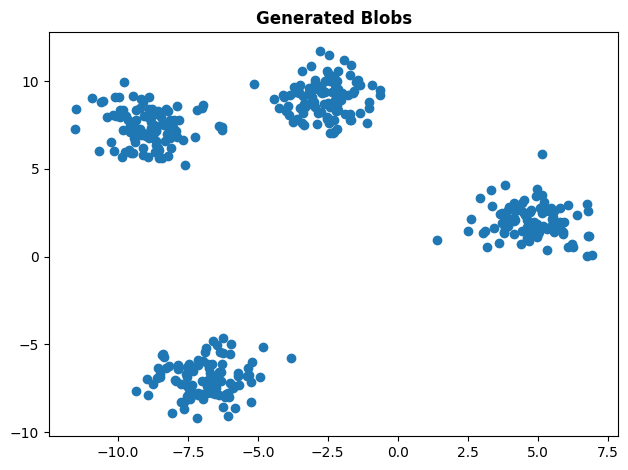

In [2]:
data_, true_lables = make_blobs(n_samples=400, n_features=2 ,centers=4, cluster_std=1.0, random_state=42)
print(f"Dataset Shape : {data_.shape} - Ground_Truth shape : {true_lables.shape}\n")
print("Explore 5 Rows From Dataset : \n",data_[1:5],"\n")
print("Explore True_Labels: ",true_lables[1:15],"\n")

# Plot
plt.scatter(data_[:,0], data_[:,1], cmap = 'viridis')
plt.title("Generated Blobs",fontsize = 12 ,fontweight = 'bold')
plt.tight_layout()
plt.show()

# **◍ Step 5: Find Best N_components For GMM.**

## **🔹 5.1: Using AIC and BIC.**


The Values For Akaike Information Criterion
For K = 1 , The  Aic: 5093.3448
For K = 2 , The  Aic: 4256.7218
For K = 3 , The  Aic: 3616.4221
For K = 4 , The  Aic: 3382.0575
For K = 5 , The  Aic: 3385.5637
For K = 6 , The  Aic: 3391.8773
For K = 7 , The  Aic: 3396.3324
For K = 8 , The  Aic: 3409.8031
For K = 9 , The  Aic: 3413.9547
For K = 10 , The  Aic: 3416.8704
The Best K For Number Of Gaussians = 4 ,With Aic-Score = 3382.0575

The Values For Bayesian Information Criterion
For K = 1 , The  Bic: 5113.3022
For K = 2 , The  Bic: 4300.6279
For K = 3 , The  Bic: 3684.2770
For K = 4 , The  Bic: 3473.8611
For K = 5 , The  Bic: 3501.3161
For K = 6 , The  Bic: 3531.5785
For K = 7 , The  Bic: 3559.9824
For K = 8 , The  Bic: 3597.4020
For K = 9 , The  Bic: 3625.5023
For K = 10 , The  Bic: 3652.3668
The Best K For Number Of Gaussians = 4 ,With Bic-Score = 3473.8611



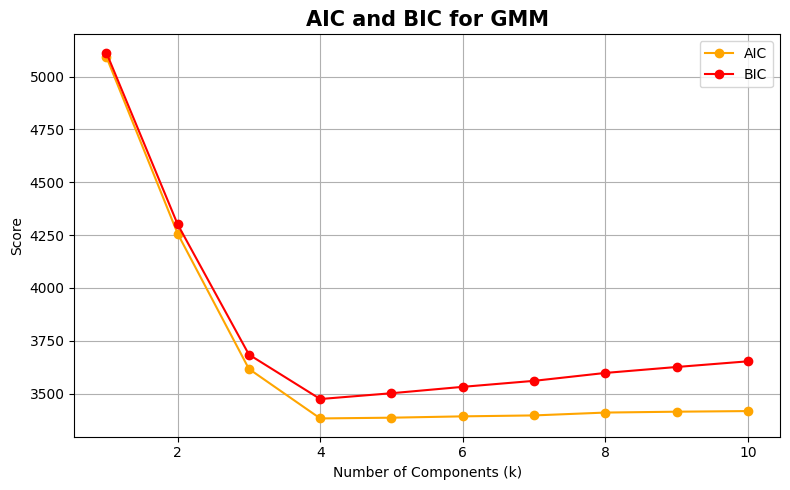

In [3]:
# Defind dicts
aic = {}
bic = {}
for k in range(1,11):
  model = GaussianMixture(n_components=k, random_state=42).fit(data_)
  aic[k] = model.aic(data_)
  bic[k] = model.bic(data_)

print("\nThe Values For Akaike Information Criterion")
for k ,aic_v in aic.items():
  print(f"For K = {k} , The  Aic: {aic_v:.4f}")

# Get best k with lower score in aic
lower_aic = min(aic, key = bic.get)
print(f"The Best K For Number Of Gaussians = {lower_aic} ,With Aic-Score = {aic[lower_aic]:.4f}")

print("\nThe Values For Bayesian Information Criterion")
for k ,bic_v in bic.items():
  print(f"For K = {k} , The  Bic: {bic_v:.4f}")

# Get best k with lower score in bic
lower_bic = min(bic, key = bic.get)
print(f"The Best K For Number Of Gaussians = {lower_bic} ,With Bic-Score = {bic[lower_bic]:.4f}\n")

# Plot
plt.figure(figsize=(8,5), dpi=100)
plt.plot(range(1,11), aic.values(), c='orange', marker = 'o', label = "AIC")
plt.plot(range(1,11), bic.values(), c='red', marker = 'o', label = "BIC")
plt.title('AIC and BIC for GMM', fontsize = 15, fontweight = 'bold')
plt.xlabel('Number of Components (k)')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## **🔹 5.2: BayesianGaussianMixture (Automatic Selection).**     
### Scikit-learn offers a **Bayesian GMM** that can __automatically prune unnecessary components__.

In [4]:
Bayesian_Gmm = BayesianGaussianMixture(n_components=20, covariance_type='full', random_state=42)
Bayesian_Gmm.fit(data_)
print(f"Model weights (πk) : \n{Bayesian_Gmm.weights_}")
print(f"\nModel weights List[T/F] : {Bayesian_Gmm.weights_>1e-2}")
print("\nEffective n_components:", np.sum(Bayesian_Gmm.weights_ > 1e-2))

Model weights (πk) : 
[0.00252424 0.00251779 0.25048109 0.00250299 0.00249457 0.00248618
 0.00247782 0.00246949 0.00246118 0.0024529  0.24392836 0.00243235
 0.0024201  0.00240791 0.00239579 0.00238373 0.00237172 0.00235978
 0.23431323 0.23211876]

Model weights List[T/F] : [False False  True False False False False False False False  True False
 False False False False False False  True  True]

Effective n_components: 4


**✅ This is ideal when you don’t want to specify n_components manually.**

# **◍ Step 6: Build GaussianMixture Model.**

In [5]:
Gmm_Model = GaussianMixture(n_components=4,random_state=42)
Gmm_Model.fit(data_)

log_likelihood = Gmm_Model.score_samples(data_)
print(f"Log_likelihood = {log_likelihood[:5]} , Size = {log_likelihood.shape}\n") # (400,)

# To concert log_likelihood to actual probs vlaue use exp
gmm_y = np.exp(log_likelihood)
print(f"Log_likelihood -> probs = {gmm_y[:5]} , Size = {gmm_y.shape}\n") # (400,)

predicted_labels = Gmm_Model.predict(data_)
print(f"Lables : {predicted_labels[:15]} , size = {predicted_labels.shape}\n") # (400,)

Log_likelihood = [-5.09812703 -7.67507046 -3.28714688 -3.52994779 -4.04572939] , Size = (400,)

Log_likelihood -> probs = [0.00610818 0.00046426 0.03736029 0.02930645 0.01749694] , Size = (400,)

Lables : [3 0 3 2 2 0 0 3 0 2 3 2 3 2 1] , size = (400,)



## **🔹 6.1: Output Model Paramters : πk, μk, Σk**

In [6]:
print("Means: ", Gmm_Model.means_ , " ⟶ Shape: ",Gmm_Model.means_.shape)
print("\nCovariances: ", Gmm_Model.covariances_," ⟶ Shape: ",Gmm_Model.covariances_.shape)
print("\nMixture wheights: ",Gmm_Model.weights_," ⟶ Shape : ",Gmm_Model.weights_.shape)

Means:  [[-2.63340741  9.0434803 ]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]
 [-8.92932115  7.38197498]]  ⟶ Shape:  (4, 2)

Covariances:  [[[ 0.7493203   0.04400541]
  [ 0.04400541  0.9872469 ]]

 [[ 1.02961821  0.09574043]
  [ 0.09574043  0.98277206]]

 [[ 1.07033552 -0.09844297]
  [-0.09844297  0.85003382]]

 [[ 0.98717804 -0.14616473]
  [-0.14616473  1.00927728]]]  ⟶ Shape:  (4, 2, 2)

Mixture wheights:  [0.25001131 0.25       0.25       0.24998869]  ⟶ Shape :  (4,)


## **🔹 6.2: Output Model Probabilites.**

In [7]:
print("Probabilities of the first 5 instances:")
probs = Gmm_Model.predict_proba(data_)
print(f"{probs[:5]} ⟶ Size = {probs.shape}") # (400 ,4)

Probabilities of the first 5 instances:
[[3.91794465e-16 8.03258236e-62 4.08775041e-53 1.00000000e+00]
 [9.99424086e-01 2.61620985e-61 6.50258843e-31 5.75914030e-04]
 [2.88705455e-13 6.24803346e-47 3.74311482e-43 1.00000000e+00]
 [2.51913599e-33 1.39061286e-46 1.00000000e+00 1.15270238e-49]
 [3.72955898e-27 3.73752019e-49 1.00000000e+00 2.17247764e-45]] ⟶ Size = (400, 4)


## **🔹 6.3: Visualization.**

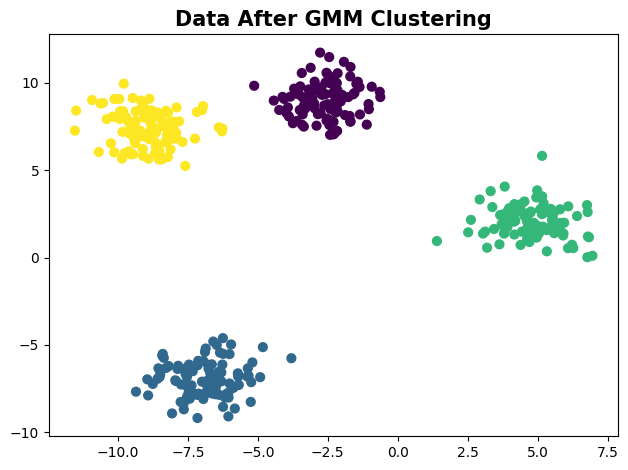

In [8]:
# Plot the Gaussian data
plt.scatter(data_[:, 0], data_[:, 1], c = predicted_labels, s = 40, cmap = 'viridis')
plt.title("Data After GMM Clustering",fontsize = 15, fontweight='bold')
plt.tight_layout()
plt.show()

# **◍ Step 7: Evaluation GMM Model.**

## **🔹 7.1: Log-Likelihood**

In [9]:
log_likelihood_Score = Gmm_Model.score(data_) * len(data_)
print(f"Model Score : {log_likelihood_Score:.4f}")

Model Score : -1668.0287


## **🔹 7.2: AIC and BIC**


In [10]:
AIC = Gmm_Model.aic(data_)
BIC = Gmm_Model.bic(data_)
print(f"AIC : {AIC:.4f}")
print(f"BIC : {BIC:.4f}")

AIC : 3382.0575
BIC : 3473.8611


---

## **🔹 7.3: Clustering Evaluation Metrics (with Ground Truth)**

- When ground truth labels are available, you can use these metrics to evaluate how well the clustering aligns with the actual classes:

### 🔸 **7.3.1: Adjusted Rand Index (ARI)**

- Measures **agreement between predicted and true labels**, adjusted for chance.
- Range: **−1 to 1**
  - **1**: Perfect match
  - **0**: Random labeling
  - **< 0**: Worse than random

$$
\text{ARI} = \frac{ \text{RI} - \text{Expected RI} }{ \max(\text{RI}) - \text{Expected RI} }
$$

In [11]:
ARI = adjusted_rand_score(true_lables ,predicted_labels)
print(f"ARI : {ARI}")

ARI : 1.0


### 🔸 **7.3.2: Normalized Mutual Information (NMI)**

Measures the **mutual dependence** between predicted and true labels.

- **Range:** 0 to 1  
  - **1** → Perfect correlation  
  - **0** → No mutual information

$$
\text{NMI}(U, V) = \frac{2 \cdot I(U; V)}{H(U) + H(V)}
$$

Where:  
- \( I(U; V) \): Mutual Information between clustering \( U \) and ground truth \( V \)  
- \( H(U), H(V) \): Entropy of the clustering and the labels

✅ **Use NMI to evaluate clustering quality when true labels are available.**

In [12]:
NMI = normalized_mutual_info_score(true_lables, predicted_labels)
print(f"NMI : {NMI}")

NMI : 1.0


### 🔸 **7.3.3: F1 Score (for classification comparison)**
- Useful if GMM is used for __soft classification__ and you apply a __threshold__ to probabilistic outputs.

- Also applicable if you're treating clustering as __multiclass__ prediction and matching clusters to ground truth labels.

- The F1-score is for __binary classification__, and depends on a __specific class label__.
- **In clustering**, __labels are arbitrary__ (cluster 0 and cluster 1 could be **flipped**), so computing __F1__ without __aligning predicted labels__ to __true labels__ causes __misleading results__.

>**GMM (unsupervised) assigns arbitrary cluster labels.**
The label “0” in predicted labels might correspond to “2” in the ground truth, and so on.   
This label **mismatch** makes `f1_score()` think the predictions are wrong — even when they are perfect.

**Note :**
- **ARI and NMI** are __label-invariant__, so they handle this.
- **F1-score** is __not label-invariant__.

#### **🔸 7.3.3.1: Align Cluster Labels First**
- You should use the **Hungarian algorithm**(a.k.a. **linear sum assignment**) to optimally match **predicted labels** to **true ones**.

In [13]:
def align_clusters(true_labels ,pred_labels):
  D = confusion_matrix(true_labels ,pred_labels)
  print(f"Confusion Matrix : \n{D}")
  row_idx ,col_idx = linear_sum_assignment(-D)
  mapping = dict(zip(col_idx, row_idx))
  align_preds = np.array([mapping[label] for label in pred_labels])
  return align_preds

# Align predicted labels
align_labels = align_clusters(true_lables ,predicted_labels)

# Now compute F1-score correctly
f1 = f1_score(true_lables, align_labels, average='weighted')
print(f"Corrected F1-Score: {f1:.4f}")

Confusion Matrix : 
[[100   0   0   0]
 [  0   0 100   0]
 [  0 100   0   0]
 [  0   0   0 100]]
Corrected F1-Score: 1.0000


# **◍ Step 8: GMM Evaluation Summary.**

| **Metric**                        | **Value**   | **What It Means**                                                                 |
|----------------------------------|-------------|------------------------------------------------------------------------------------|
| **Log-Likelihood**               | -1668.03    | Excellent model fit — higher than before (less negative = better)                 |
| **AIC**                          | 3382.06     | Lower AIC means a better trade-off between fit and complexity                     |
| **BIC**                          | 3473.86     | Lower BIC also confirms model is efficient and not overfitting                    |
| **Normalized Mutual Information**| 1.0         | Perfect clustering: 100% info overlap with ground truth                           |
| **Adjusted Rand Index (ARI)**    | 1.0         | Perfect match: clustering is exactly like the true labels                         |
| **F1-Score (after alignment)**   | 1.0         | Every class is predicted perfectly, no precision or recall loss                   |


<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Thanks & Upvote ❤️</p>